In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Titanic dataset directly from Seaborn
titanic = sns.load_dataset('titanic')

In [3]:
# Load the Titanic dataset directly from Seaborn
titanic = sns.load_dataset('titanic')

In [4]:
# Get a summary of the dataset structure
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# Descriptive statistics
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


So far in the analysis, we can see the following:
- We have 891 entries and several columns have missing data, including Age, Embark, Embarked_Town, and Deck
- Based on the summary statistics, we can see that

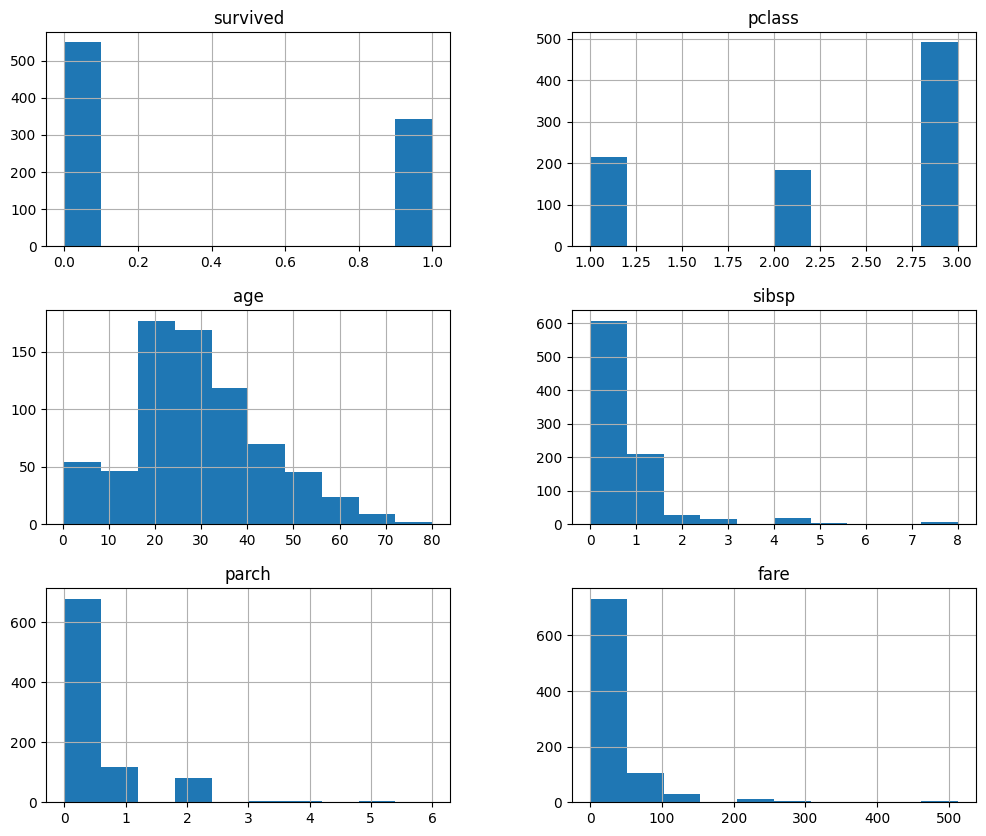

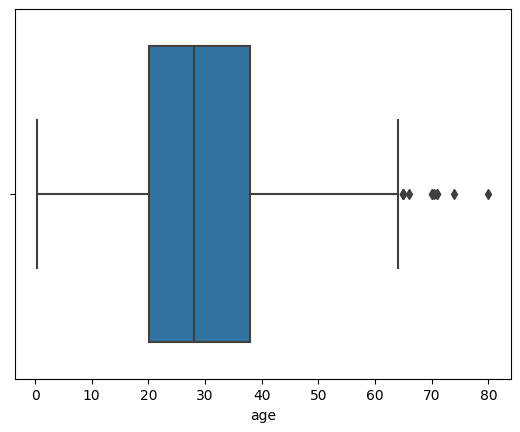

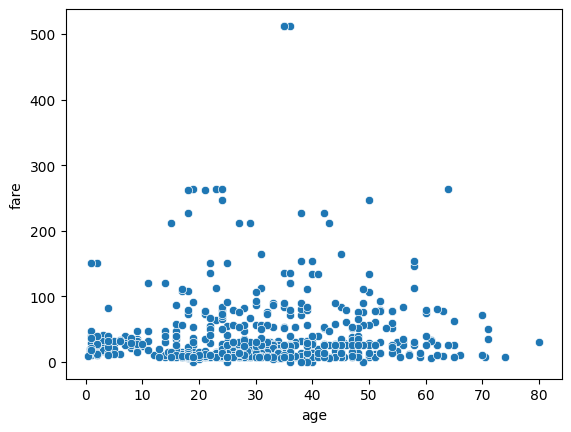

/var/folders/75/tr_v06ms4k7gy38vcppxbcf80000gn/T/ipykernel_33795/800050979.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic.corr()


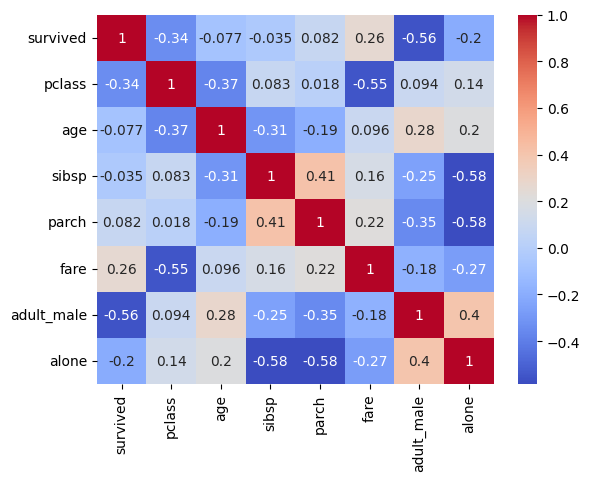

In [6]:
# Histograms
titanic.hist(figsize=(12, 10))
plt.show()

# Box plot of 'age' variable
sns.boxplot(x='age', data=titanic)
plt.show()

# Scatter plot of 'age' vs. 'fare'
sns.scatterplot(x='age', y='fare', data=titanic)
plt.show()

# Correlation matrix heatmap
corr_matrix = titanic.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [7]:
# Handling missing values: fill missing 'age' values with median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Removing duplicates: check for duplicates and drop if any
titanic.drop_duplicates(inplace=True)

# Correcting data entry errors: replace any negative 'fare' values with the median fare
titanic.loc[titanic['fare'] < 0, 'fare'] = titanic['fare'].median()

# Converting data types: convert 'sex' variable to a categorical data type
titanic['sex'] = titanic['sex'].astype('category')

# Addressing outliers: remove rows where 'fare' is greater than 3 standard deviations from the mean
fare_mean = titanic['fare'].mean()
fare_std = titanic['fare'].std()
titanic = titanic[(titanic['fare'] >= fare_mean - 3 * fare_std) & (titanic['fare'] <= fare_mean + 3 * fare_std)]

In [11]:
1+2

3

In [8]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,0.406045,2.273325,29.590565,0.519054,0.400788,28.323182
std,0.491416,0.842262,13.807613,0.982728,0.824589,30.387952
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.500000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,164.866700


In [9]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [13]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,0.406045,2.273325,29.590565,0.519054,0.400788,28.323182
std,0.491416,0.842262,13.807613,0.982728,0.824589,30.387952
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.500000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,164.866700


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     761 non-null    int64   
 1   pclass       761 non-null    int64   
 2   sex          761 non-null    category
 3   age          761 non-null    float64 
 4   sibsp        761 non-null    int64   
 5   parch        761 non-null    int64   
 6   fare         761 non-null    float64 
 7   embarked     759 non-null    object  
 8   class        761 non-null    category
 9   who          761 non-null    object  
 10  adult_male   761 non-null    bool    
 11  deck         185 non-null    category
 12  embark_town  759 non-null    object  
 13  alive        761 non-null    object  
 14  alone        761 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(4)
memory usage: 69.7+ KB
